In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]

mask_sf = sdss['ssfr'] >= -10.75
mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
mask_q = (sdss['ssfr'] < -11.25)

from galsize_models.measurements.sdss_covariance import sdss_measurements_and_cov
sdss_data_vector, sdss_cov = sdss_measurements_and_cov()

In [3]:
from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()

Total runtime = 29.32 seconds


# Inspect specific model

In [4]:
from galsize_models.models.bulge_disk_double_power_law import data_vector_prediction
from galsize_models.measurements.sdss_covariance import logsm_bins, logsm_mids
from astropy.table import Table 

chain_fname = "bulge_disk_power_law_chain_aggressive_priors.dat"

itest = -1
try:
    chain = Table.read(chain_fname, format='ascii')
    chain.sort('lnprob')
    row = chain[itest]
    params = [row[key] for key in row.colnames if key != 'lnprob']
    lnprob = row['lnprob']
    print(row)
except:
    norm_bulge = 0.0032
    bulge_to_disk_size_ratio = 0.4143
    alpha_bulge = 1.1449
    alpha_disk = 1.084
    scatter = 0.1059
    params = norm_bulge, bulge_to_disk_size_ratio, alpha_bulge, alpha_disk, scatter
    
model_data_vector = data_vector_prediction(params, mock, logsm_bins)



norm_bulge bulge_to_disk_size_ratio alpha_bulge alpha_disk scatter    lnprob 
---------- ------------------------ ----------- ---------- -------- ---------
  0.005121                 0.493154    0.863204   1.075326 0.246319 -5.037748


In [8]:
chain[-1]

norm_bulge,bulge_to_disk_size_ratio,alpha_bulge,alpha_disk,scatter,lnprob
float64,float64,float64,float64,float64,float64
0.005121,0.493154,0.863204,1.075326,0.246319,-5.037748


In [13]:
norm_bulge = 0.0032
bulge_to_disk_size_ratio = 0.4143
alpha_bulge = 1.1449
alpha_disk = 1.084
scatter = 0.1059

norm_bulge = 0.005
bulge_to_disk_size_ratio = 1/5.
alpha_bulge = 1.
alpha_disk = 1.
scatter = 0.2

params2 = norm_bulge, bulge_to_disk_size_ratio, alpha_bulge, alpha_disk, scatter  
model_data_vector2 = data_vector_prediction(params2, mock, logsm_bins)


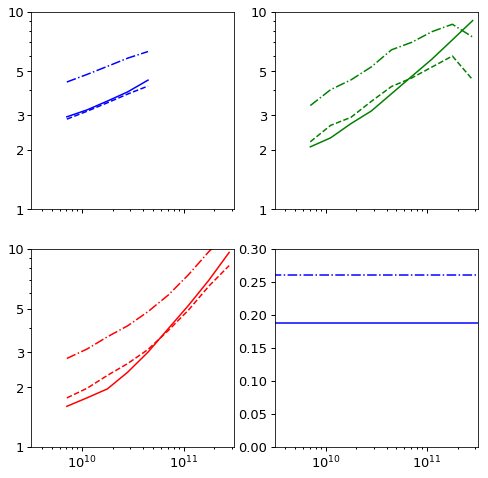

In [14]:
from galsize_models.measurements.sdss_covariance import _get_ifirst_ilast_indices
from matplotlib import ticker

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
(ax1, ax2), (ax3, ax4) = axes
axis_list = (ax1, ax2, ax3, ax4)
__=ax1.loglog(); __=ax2.loglog(); __=ax3.loglog(); __=ax4.set_xscale('log')

for ax in axis_list[:-1]:
    ylim = ax.set_ylim(1, 10)
    __=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())
    __=ax.set_yticks((1, 2, 3, 5, 10))



ifirst, ilast = _get_ifirst_ilast_indices(0)
nskip = ilast-ifirst
__=ax1.plot(10**logsm_mids[:nskip], sdss_data_vector[ifirst:ilast], color='blue')
__=ax1.plot(10**logsm_mids[:nskip], model_data_vector[ifirst:ilast], '--', color='blue')
__=ax1.plot(10**logsm_mids[:nskip], model_data_vector2[ifirst:ilast], '-.', color='blue')

ifirst, ilast = _get_ifirst_ilast_indices(1)
nskip = ilast-ifirst
__=ax2.plot(10**logsm_mids[:nskip], sdss_data_vector[ifirst:ilast], color='green')
__=ax2.plot(10**logsm_mids[:nskip], model_data_vector[ifirst:ilast], '--', color='green')
__=ax2.plot(10**logsm_mids[:nskip], model_data_vector2[ifirst:ilast], '-.', color='green')

ifirst, ilast = _get_ifirst_ilast_indices(2)
nskip = ilast-ifirst
__=ax3.plot(10**logsm_mids[:nskip], sdss_data_vector[ifirst:ilast], color='red')
__=ax3.plot(10**logsm_mids[:nskip], model_data_vector[ifirst:ilast], '--', color='red')
__=ax3.plot(10**logsm_mids[:nskip], model_data_vector2[ifirst:ilast], '-.', color='red')

ifirst, ilast = _get_ifirst_ilast_indices(3)
_x = np.logspace(9, 12, len(logsm_mids))
y_data = np.zeros_like(logsm_mids) + sdss_data_vector[ifirst]
y_model = np.zeros_like(logsm_mids) + model_data_vector[ifirst]
y_model2 = np.zeros_like(logsm_mids) + model_data_vector2[ifirst]
__=ax4.plot(_x, y_data, color='blue')
__=ax4.plot(_x, y_model, '--', color='blue')
__=ax4.plot(_x, y_model2, '-.', color='blue')
# ifirst, ilast = _get_ifirst_ilast_indices(5)
# y_data = np.zeros_like(logsm_mids) + sdss_data_vector[ifirst]
# y_model = np.zeros_like(logsm_mids) + model_data_vector[ifirst]
# __=ax4.plot(_x, y_data, color='red')
# __=ax4.plot(_x, y_model, '--', color='red')


for ax in axis_list:
    xlim = ax.set_xlim(10**9.5, 10**11.5)

ylim4 = ax.set_ylim(0, 0.3)
